### PCA算法 对digit 和iris鸢尾花数据集进行降维 1 计算协方差阵，计算特征值和特征向量，排序，取前n个特征向量，最后点乘 降维完毕

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#计算协方差矩阵
def cal_cov_matrix(X,Y=None):
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    cov_matrix = (1/(n_samples-1))*(X-X.mean(axis=0)).T.dot(Y-Y.mean(axis=0))
    return np.array(cov_matrix,dtype=float)

def PCA(X,n_components):
    cov_matrix = cal_cov_matrix(X)
    #特征值分解
    eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)
    #特征值排序 大到小
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx][:n_components]
    #计算出W 特征向量矩阵
    W = np.atleast_1d(eigenvectors[:,idx])[:,:n_components]
    #映射低维空间
    X_transformed = X.dot(W)
    return X_transformed


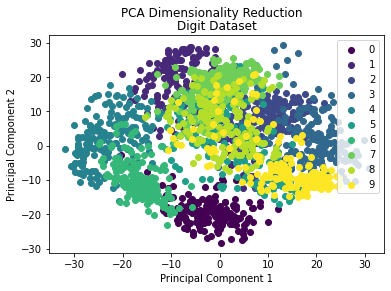

In [2]:
#对数据集进行PCA
data = datasets.load_digits()
X = data.data
y = data.target
#取两个主成分
nw = 2
X_trans = PCA(X,nw)
x1 =X_trans[:,0]
x2 =X_trans[:,1]

#visualation
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

class_disr = []
target = np.unique(y)
for i,l in enumerate(target):
    _x1 = x1[y==l]
    _x2 = x2[y==l]
    _y = y[y==l]
    class_disr.append(plt.scatter(_x1,_x2,color = colors[i]))

#添加标签
target_names = data.target_names

plt.legend(class_disr,target_names,loc =1)
#画图
plt.suptitle("PCA Dimensionality Reduction")
plt.title("Digit Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

(150, 4) (150,)


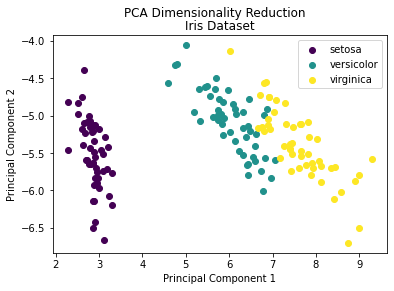

In [4]:
#换到鸢尾花
#对数据集进行PCA
data = datasets.load_iris()
X = data.data
y = data.target
print(X.shape,y.shape)
#取两个主成分
nw = 2
X_trans = PCA(X,nw)
x1 =X_trans[:,0]
x2 =X_trans[:,1]

#visualation
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

class_disr = []
target = np.unique(y)
for i,l in enumerate(target):
    _x1 = x1[y==l]
    _x2 = x2[y==l]
    _y = y[y==l]
    class_disr.append(plt.scatter(_x1,_x2,color = colors[i]))

#添加标签
target_names = data.target_names
plt.legend(class_disr,target_names,loc =1)
#画图
plt.suptitle("PCA Dimensionality Reduction")
plt.title("Iris Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# mission 2  k-means算法 
# 1 参数初始化
# 2 计算类簇中心
# 3 对样本进行归类

In [5]:
#mission 2  k-meanss
from scipy.spatial.distance import cdist 

def load_data(x):
    if x ==1:
    #digits
        data = datasets.load_digits()
    #iris
    elif x ==2:
        data = datasets.load_iris()
    elif x==3:
        data = datasets.load_wine()
    X = data.data 
    X_trans = PCA(X,2)
    return X_trans

class KMeans(object):
    def __init__(self,n_clusters):
        #初始化中心
        self.n_clusters = n_clusters

    def fit(self,X,iter_max = 100):
        #初始化中心个数的 one-hot 编码
        I= np.eye(self.n_clusters)
        centers = X[np.random.choice(len(X),self.n_clusters,replace=False)]
        for _ in range(iter_max):
            prev_centers = np.copy(centers)
            #comput ou distance
            D = cdist(X,centers)
            cluster_num_index = np.argmin(D,axis=1)
            cluster_num = I[cluster_num_index]
            #avg
            centers =np.sum(X[:,None,:]*cluster_num[:,:,None],axis=0)/np.sum(cluster_num,axis=0)[:,None]
            #if pre_center ==center break
            if np.allclose(prev_centers,centers):
                break
        
        self.centers = centers
        return centers
    
    def predict(self,X):
        D = cdist(X,self.centers)
        return np.argmin(D,axis=1)
        
#visualation
def visual(input_data,n_cluster):
#for digits ==1  for iris ==2
    data = load_data(input_data)
    print(type(data),data.shape)
    Kmeans = KMeans(n_cluster)
    centers = Kmeans.fit(data)
    res = Kmeans.predict(data)
    plt.scatter(data[:,0],data[:,1],c=res)
    plt.scatter(centers[:,0],centers[:,1],c='red',s=50)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Kmeans for the input dataset')
    #plt.savefig('kmeans for digits)
    plt.show()


<class 'numpy.ndarray'> (1797, 2)


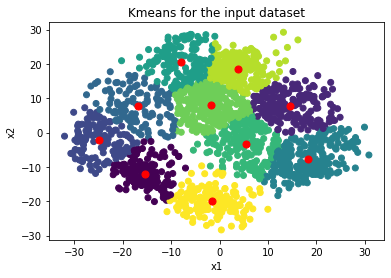

In [6]:
#digits
visual(1,10)

<class 'numpy.ndarray'> (150, 2)


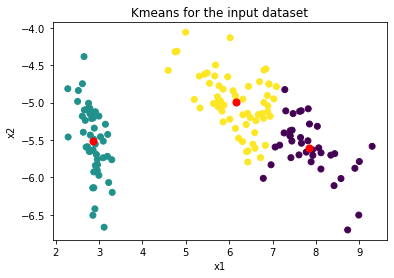

In [8]:
#iris
visual(2,3)

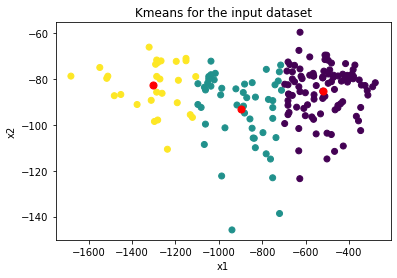

In [ ]:
#wine 红酒数据集
visual(3,3)